# FBRef

## Package installations

In [ ]:
!python -m pip install --upgrade pip
!pip install pandas
!pip install soccerdata
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

In [6]:
import os
import pandas as pd
import soccerdata as sd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

sd.FBref.available_leagues()

[08/26/23 22:07:45] INFO     No custom team name replacements found. You can configure these in       ]8;id=890831;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=384315;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_config.py#84\84]8;;\
                             C:\Users\lantz\soccerdata\config\teamname_replacements.json.                          

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=585209;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=430945;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_config.py#162\162]8;;\
                             C:\Users\lantz\soccerdata\config\league_dict.json.                                    

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

# English Premier League 2018-2023 seasons

In [103]:
# MUST RUN BEFORE CREATING NEW DATA FILE
fbref = sd.FBref(leagues="ENG-Premier League", seasons=['18-19','19-20','20-21','21-22','22-23'])
# print(fbref.__doc__)

[08/28/23 07:49:52] INFO     Saving cached data to C:\Users\lantz\soccerdata\data\FBref               ]8;id=728859;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=340112;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_common.py#89\89]8;;\

## Fetch and clean data

In [117]:
### Get data
stats_pd = fbref.read_player_season_stats(stat_type='standard')

### Convert data types
cols = list(stats_pd.columns)
for col in cols:
    if col in [('nation', ''),('pos', ''),('born', '')]:
        stats_pd[col] = stats_pd[col].astype(str)
    else:
        stats_pd[col] = stats_pd[col].apply(pd.to_numeric)
# print("Data types:")
print(stats_pd.info())

print("\n***** Print data - stats only *****")
stats_pd_data = stats_pd.drop(columns=[('nation', ''),('pos', ''),('born', '')])
stats_pd_data.fillna(value=0, inplace=True)
stats_pd_data.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2677 entries, ('ENG-Premier League', '1819', 'Arsenal', 'Aaron Ramsey') to ('ENG-Premier League', '2223', 'Wolves', 'Toti Gomes')
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (nation, )                  2677 non-null   object 
 1   (pos, )                     2677 non-null   object 
 2   (age, )                     2677 non-null   int64  
 3   (born, )                    2677 non-null   object 
 4   (Playing Time, MP)          2677 non-null   int64  
 5   (Playing Time, Starts)      2677 non-null   int64  
 6   (Playing Time, Min)         2677 non-null   int64  
 7   (Playing Time, 90s)         2677 non-null   float64
 8   (Performance, Gls)          2677 non-null   int64  
 9   (Performance, Ast)          2677 non-null   int64  
 10  (Performance, G+A)          2677 non-null   int64  
 11  (Performance, G-PK)         2677 non-null

age Playing Time  \
                                                                       MP   
league             season team    player                                    
ENG-Premier League 1819   Arsenal Aaron Ramsey            27           28   
                                  Ainsley Maitland-Niles  20           16   
                                  Alex Iwobi              22           35   
                                  Alexandre Lacazette     27           35   
                                  Bernd Leno              26           32   

                                                                             \
                                                         Starts   Min   90s   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey               14  1331  14.8   
                                  Ainsley Maitland-Niles     11   987  11.0   
                                  Alex Iwobi                 22  1970  21.9   
                                  Alexandre Lacazette        27  2502  27.8   
                                  Bernd Leno                 31  2836  31.5   

                                                         Performance          \
                                                                 Gls Ast G+A   
league             season team    player                                       
ENG-Premier League 1819   Arsenal Aaron Ramsey                     4   6  10   
                                  Ainsley Maitland-Niles           1   1   2   
                                  Alex Iwobi                       3   6   9   
                                  Alexandre Lacazette             13   8  21   
                                  Bernd Leno                       0   0   0   

                                                                  ...  \
                                                         G-PK PK  ...   
league             season team    player                          ...   
ENG-Premier League 1819   Arsenal Aaron Ramsey              4  0  ...   
                                  Ainsley Maitland-Niles    1  0  ...   
                                  Alex Iwobi                3  0  ...   
                                  Alexandre Lacazette      13  0  ...   
                                  Bernd Leno                0  0  ...   

                                                         Per 90 Minutes        \
                                                                    Gls   Ast   
league             season team    player                                        
ENG-Premier League 1819   Arsenal Aaron Ramsey                     0.27  0.41   
                                  Ainsley Maitland-Niles           0.09  0.09   
                                  Alex Iwobi                       0.14  0.27   
                                  Alexandre Lacazette              0.47  0.29   
                                  Bernd Leno                       0.00  0.00   

                                                                             \
                                                           G+A  G-PK G+A-PK   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey            0.68  0.27   0.68   
                                  Ainsley Maitland-Niles  0.18  0.09   0.18   
                                  Alex Iwobi              0.41  0.14   0.41   
                                  Alexandre Lacazette     0.76  0.47   0.76   
                                  Bernd Leno              0.00  0.00   0.00   

                                                                             \
                                                            xG   xAG xG+xAG   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey            0.23

## Data Analysis

In [105]:
stats_pd_data = stats_pd.drop(columns=[('nation', ''),('pos', ''),('born', '')])
stats_pd_data.head()

age Playing Time  \
                                                                       MP   
league             season team    player                                    
ENG-Premier League 1819   Arsenal Aaron Ramsey            27           28   
                                  Ainsley Maitland-Niles  20           16   
                                  Alex Iwobi              22           35   
                                  Alexandre Lacazette     27           35   
                                  Bernd Leno              26           32   

                                                                             \
                                                         Starts   Min   90s   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey               14  1331  14.8   
                                  Ainsley Maitland-Niles     11   987  11.0   
                                  Alex Iwobi                 22  1970  21.9   
                                  Alexandre Lacazette        27  2502  27.8   
                                  Bernd Leno                 31  2836  31.5   

                                                         Performance          \
                                                                 Gls Ast G+A   
league             season team    player                                       
ENG-Premier League 1819   Arsenal Aaron Ramsey                     4   6  10   
                                  Ainsley Maitland-Niles           1   1   2   
                                  Alex Iwobi                       3   6   9   
                                  Alexandre Lacazette             13   8  21   
                                  Bernd Leno                       0   0   0   

                                                                  ...  \
                                                         G-PK PK  ...   
league             season team    player                          ...   
ENG-Premier League 1819   Arsenal Aaron Ramsey              4  0  ...   
                                  Ainsley Maitland-Niles    1  0  ...   
                                  Alex Iwobi                3  0  ...   
                                  Alexandre Lacazette      13  0  ...   
                                  Bernd Leno                0  0  ...   

                                                         Per 90 Minutes        \
                                                                    Gls   Ast   
league             season team    player                                        
ENG-Premier League 1819   Arsenal Aaron Ramsey                     0.27  0.41   
                                  Ainsley Maitland-Niles           0.09  0.09   
                                  Alex Iwobi                       0.14  0.27   
                                  Alexandre Lacazette              0.47  0.29   
                                  Bernd Leno                       0.00  0.00   

                                                                             \
                                                           G+A  G-PK G+A-PK   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey            0.68  0.27   0.68   
                                  Ainsley Maitland-Niles  0.18  0.09   0.18   
                                  Alex Iwobi              0.41  0.14   0.41   
                                  Alexandre Lacazette     0.76  0.47   0.76   
                                  Bernd Leno              0.00  0.00   0.00   

                                                                             \
                                                            xG   xAG xG+xAG   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey            0.23

### Create data correlation matrix

In [108]:
matrix = stats_pd_data.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                              age Playing Time                                \
                                            MP    Starts       Min       90s   
age                      1.000000     0.170172  0.190972  0.193253  0.193234   
Playing Time   MP        0.170172     1.000000  0.926151  0.938308  0.938319   
               Starts    0.190972     0.926151  1.000000  0.996353  0.996345   
               Min       0.193253     0.938308  0.996353  1.000000  0.999997   
               90s       0.193234     0.938319  0.996345  0.999997  1.000000   
Performance    Gls       0.039908     0.453496  0.412377  0.408504  0.408518   
               Ast       0.022698     0.497952  0.458633  0.455067  0.455094   
               G+A       0.037403     0.527485  0.482146  0.477934  0.477956   
               G-PK      0.027826     0.456849  0.409973  0.405714  0.405730   
               PK        0.072102     0.213710  0.217812  0.217525  0.217523   
               

### Get statistical overview of all player stats grouped by player

In [109]:
playerGroups = stats_pd_data.groupby('player')
playerGroups.describe()

age                                                       \
                                                                              
                 count       mean       std   min    25%   50%    75%   max   
player                                                                        
Aaron Connolly     3.0  20.000000  1.000000  19.0  19.50  20.0  20.50  21.0   
Aaron Cresswell    5.0  30.000000  1.581139  28.0  29.00  30.0  31.00  32.0   
Aaron Hickey       1.0  20.000000       NaN  20.0  20.00  20.0  20.00  20.0   
Aaron Lennon       3.0  32.333333  1.527525  31.0  31.50  32.0  33.00  34.0   
Aaron Mooy         2.0  27.500000  0.707107  27.0  27.25  27.5  27.75  28.0   
...                ...        ...       ...   ...    ...   ...    ...   ...   
Érik Lamela        3.0  27.000000  1.000000  26.0  26.50  27.0  27.50  28.0   
Étienne Capoue     2.0  30.500000  0.707107  30.0  30.25  30.5  30.75  31.0   
Ørjan Nyland       1.0  28.000000       NaN  28.0  28.00  28.0  28.00  28.0   
İlkay Gündoğan     5.0  29.000000  1.581139  27.0  28.00  29.0  30.00  31.0   
Łukasz Fabiański   5.0  35.000000  1.581139  33.0  34.00  35.0  36.00  37.0   

                 Playing Time             ... Per 90 Minutes                 \
                           MP             ...           npxG       npxG+xAG   
                        count       mean  ...            75%   max    count   
player                                    ...                                 
Aaron Connolly            3.0  15.000000  ...         0.3650  0.45      3.0   
Aaron Cresswell           5.0  29.200000  ...         0.0400  0.05      5.0   
Aaron Hickey              1.0  26.000000  ...         0.0200  0.02      1.0   
Aaron Lennon              3.0  20.000000  ...         0.0600  0.06      3.0   
Aaron Mooy                2.0  30.000000  ...         0.0950  0.10      2.0   
...                       ...        ...  ...            ...   ...      ...   
Érik Lamela               3.0  22.333333  ...         0.2650  0.31      3.0   
Étienne Capoue            2.0  31.500000  ...         0.0375  0.04      2.0   
Ørjan Nyland              1.0   7.000000  ...         0.0000  0.00      1.0   
İlkay Gündoğan            5.0  29.600000  ...         0.3300  0.44      5.0   
Łukasz Fabiański          5.0  34.200000  ...         0.0000  0.00      5.0   

                                                                         
                                                                         
                      mean       std   min     25%    50%     75%   max  
player                                                                   
Aaron Connolly    0.353333  0.113725  0.26  0.2900  0.320  0.4000  0.48  
Aaron Cresswell   0.150000  0.043012  0.09  0.1400  0.150  0.1600  0.21  
Aaron Hickey      0.040000       NaN  0.04  0.0400  0.040  0.0400  0.04  
Aaron Lennon      0.076667  0.041633  0.03  0.0600  0.090  0.1000  0.11  
Aaron Mooy        0.235000  0.077782  0.18  0.2075  0.235  0.2625  0.29  
...                    ...       ...   ...     ...    ...     ...   ...  
Érik Lamela       0.346667  0.117189  0.26  0.2800  0.300  0.3900  0.48  
Étienne Capoue    0.105000  0.049497  0.07  0.0875  0.105  0.1225  0.14  
Ørjan Nyland      0.000000       NaN  0.00  0.0000  0.000  0.0000  0.00  
İlkay Gündoğan    0.416000  0.173868  0.20  0.3500  0.380  0.4800  0.67  
Łukasz Fabiański  0.000000  0.000000  0.00  0.0000  0.000  0.0000  0.00  

[1156 rows x 240 columns]

## Data Models

### Predicted Goal Contributions

#### Create training and test datasets

In [118]:
# create subsets with players that played more than half the season
stats_pd_data = stats_pd_data[stats_pd_data['Playing Time']['90s'] > 19]

# Group data by player
player_groups = stats_pd_data.groupby('player')

# Transform data columns to arrays
expected_ga = player_groups.mean()['Expected']['npxG+xAG'].to_numpy()
actual_ga = player_groups.mean()['Performance']['G+A'].to_numpy()

# Split the data into training/testing sets
expected_ga_train = expected_ga[:-20].reshape(-1, 1)
expected_ga_test = expected_ga[-20:].reshape(-1, 1)

# Split the targets into training/testing sets
actual_ga_train = actual_ga[:-20]
actual_ga_test = actual_ga[-20:]

# Check dataset
top = player_groups.mean().sort_values(by=[('Performance','G+A')], ascending=False).head(15)
top[('Performance','G+A')]

player
Erling Haaland               44.000000
Eden Hazard                  31.000000
Mohamed Salah                30.600000
Sergio Agüero                29.000000
Harry Kane                   27.400000
Kevin De Bruyne              24.250000
Patrick Bamford              24.000000
Anthony Martial              23.000000
Son Heung-min                22.400000
Pierre-Emerick Aubameyang    21.666667
Cristiano Ronaldo            21.000000
Sadio Mané                   21.000000
Bruno Fernandes              20.666667
Ivan Toney                   20.500000
Marcus Rashford              20.500000
Name: (Performance, G+A), dtype: float64

#### Linear Regression

Coefficients:  [1.15870302]
Mean squared error: 1.00
Coefficient of determination: 0.92


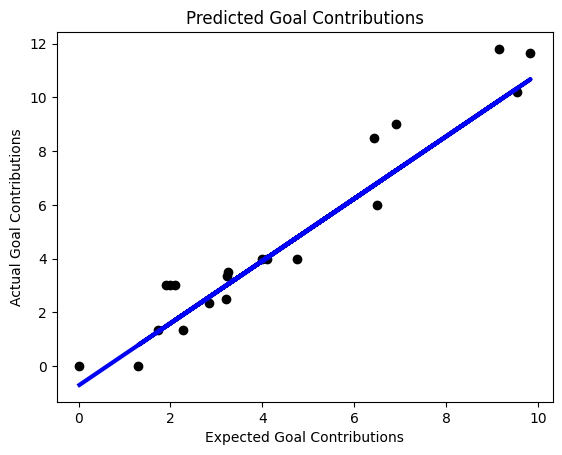

In [119]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(expected_ga_train,actual_ga_train)

# Make predictions using the testing set
actual_ga_pred = reg.predict(expected_ga_test)

# The coefficients
print("Coefficients: ", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(actual_ga_test, actual_ga_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(actual_ga_test, actual_ga_pred))

#Create plot area
fig, ax = plt.subplots()

ax.set_title("Predicted Goal Contributions")
ax.set_ylabel("Actual Goal Contributions")
ax.set_xlabel("Expected Goal Contributions")

# Plot outputs
plt.scatter(expected_ga_test, actual_ga_test, color="black")
plt.plot(expected_ga_test, actual_ga_pred, color="blue", linewidth=3)

plt.show()

#### Representational Similarity Analysis (RSA)

In [ ]:
!pip install rsatoolbox

(<Figure size 200x200 with 1 Axes>,
 array([[<Axes: >]], dtype=object),
 defaultdict(dict,
             {<Axes: >: {'image': <matplotlib.image.AxesImage at 0x1d944a2cfd0>}}))

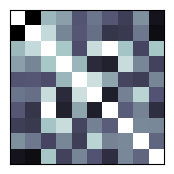

In [3]:
import numpy as np
import rsatoolbox
data = rsatoolbox.data.Dataset(np.random.rand(10, 5))
rdms = rsatoolbox.rdm.calc_rdm(data)
rsatoolbox.vis.show_rdm(rdms)

### Creative Player Rating

#### Feature engineering

In [173]:
# create dataframe with players that played more than half the season
creative_plyr_df = stats_pd_data[stats_pd_data['Playing Time']['90s'] > 19]

# create dataframe with relevant features
creative_plyr_df = creative_plyr_df[[
    ('Per 90 Minutes', 'G+A'),
    ('Per 90 Minutes', 'xG+xAG'),
    ('Per 90 Minutes', 'npxG+xAG'),
    ('Progression', 'PrgC'),
    ('Progression', 'PrgP')]]

feature_weights = {
    'G+A per 90': 0.40,
    'xG+xAG per 90': 0.20,
    'npxG+xAG per 90': 0.25,
    'PrgC': 0.05,
    'PrgP': 0.10
}

# calculate quartiles for each column
quartiles = creative_plyr_df.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)

# check quartiles
print("Quartiles:")
print(quartiles)

Quartiles:
     Per 90 Minutes                 Progression       
                G+A xG+xAG npxG+xAG        PrgC   PrgP
0.25           0.05   0.07     0.07        14.0   58.0
0.50           0.13   0.14     0.14        38.0   91.0
0.75           0.32   0.33     0.32        69.0  134.0


#### Calculate Creative Rating

In [174]:
# calculate creative rating feature - whole dataset
ratings = []

for i in range(0,len(creative_plyr_df)):
    rating = 0.0

    # Goal contributions per 90 minutes
    if creative_plyr_df['Per 90 Minutes']['G+A'][i] < quartiles[('Per 90 Minutes', 'G+A')][0.25]:
        # less than the 25th percentile
        rating += feature_weights['G+A per 90'] * 0.25
    elif (creative_plyr_df['Per 90 Minutes']['G+A'][i] >= quartiles[('Per 90 Minutes', 'G+A')][0.25]) and (creative_plyr_df['Per 90 Minutes']['G+A'][i] < quartiles[('Per 90 Minutes', 'G+A')][0.50]):
        # between 25th and 50th percentile
        rating += feature_weights['G+A per 90'] * 0.50
    elif (creative_plyr_df['Per 90 Minutes']['G+A'][i] >= quartiles[('Per 90 Minutes', 'G+A')][0.50]) and (creative_plyr_df['Per 90 Minutes']['G+A'][i] < quartiles[('Per 90 Minutes', 'G+A')][0.75]):
        # between 50th and 75th percentile
        rating += feature_weights['G+A per 90'] * 0.75
    else:
        # above 75th percentile
        rating += feature_weights['G+A per 90']

    # Expected goal contributions per 90 minutes
    if creative_plyr_df['Per 90 Minutes']['xG+xAG'][i] < quartiles[('Per 90 Minutes', 'xG+xAG')][0.25]:
        # less than the 25th percentile
        rating += feature_weights['xG+xAG per 90'] * 0.25
    elif (creative_plyr_df['Per 90 Minutes']['xG+xAG'][i] >= quartiles[('Per 90 Minutes', 'xG+xAG')][0.25]) and (creative_plyr_df['Per 90 Minutes']['xG+xAG'][i] < quartiles[('Per 90 Minutes', 'xG+xAG')][0.50]):
        # between 25th and 50th percentile
        rating += feature_weights['xG+xAG per 90'] * 0.50
    elif (creative_plyr_df['Per 90 Minutes']['xG+xAG'][i] >= quartiles[('Per 90 Minutes', 'xG+xAG')][0.50]) and (creative_plyr_df['Per 90 Minutes']['xG+xAG'][i] < quartiles[('Per 90 Minutes', 'xG+xAG')][0.75]):
        # between 50th and 75th percentile
        rating += feature_weights['xG+xAG per 90'] * 0.75
    else:
        # above 75th percentile
        rating += feature_weights['xG+xAG per 90']

    # Non-penalty expected goal contributions per 90 minutes
    if creative_plyr_df['Per 90 Minutes']['npxG+xAG'][i] < quartiles[('Per 90 Minutes', 'npxG+xAG')][0.25]:
        # less than the 25th percentile
        rating += feature_weights['npxG+xAG per 90'] * 0.25
    elif (creative_plyr_df['Per 90 Minutes']['npxG+xAG'][i] >= quartiles[('Per 90 Minutes', 'npxG+xAG')][0.25]) and (creative_plyr_df['Per 90 Minutes']['npxG+xAG'][i] < quartiles[('Per 90 Minutes', 'npxG+xAG')][0.50]):
        # between 25th and 50th percentile
        rating += feature_weights['npxG+xAG per 90'] * 0.50
    elif (creative_plyr_df['Per 90 Minutes']['npxG+xAG'][i] >= quartiles[('Per 90 Minutes', 'npxG+xAG')][0.50]) and (creative_plyr_df['Per 90 Minutes']['npxG+xAG'][i] < quartiles[('Per 90 Minutes', 'npxG+xAG')][0.75]):
        # between 50th and 75th percentile
        rating += feature_weights['npxG+xAG per 90'] * 0.75
    else:
        # above 75th percentile
        rating += feature_weights['npxG+xAG per 90']

    # Progressive carries
    if creative_plyr_df['Progression']['PrgC'][i] < quartiles[('Progression', 'PrgC')][0.25]:
        # less than the 25th percentile
        rating += feature_weights['PrgC'] * 0.25
    elif (creative_plyr_df['Progression']['PrgC'][i] >= quartiles[('Progression', 'PrgC')][0.25]) and (creative_plyr_df['Progression']['PrgC'][i] < quartiles[('Progression', 'PrgC')][0.50]):
        # between 25th and 50th percentile
        rating += feature_weights['PrgC'] * 0.50
    elif (creative_plyr_df['Progression']['PrgC'][i] >= quartiles[('Progression', 'PrgC')][0.50]) and (creative_plyr_df['Progression']['PrgC'][i] < quartiles[('Progression', 'PrgC')][0.75]):
        # between 50th and 75th percentile
        rating += feature_weights['PrgC'] * 0.75
    else:
        # above 75th percentile
        rating += feature_weights['PrgC']

    # Progressive passes
    if creative_plyr_df['Progression']['PrgP'][i] < quartiles[('Progression', 'PrgP')][0.25]:
        # less than the 25th percentile
        rating += feature_weights['PrgP'] * 0.25
    elif (creative_plyr_df['Progression']['PrgP'][i] >= quartiles[('Progression', 'PrgP')][0.25]) and (creative_plyr_df['Progression']['PrgP'][i] < quartiles[('Progression', 'PrgP')][0.50]):
        # between 25th and 50th percentile
        rating += feature_weights['PrgP'] * 0.50
    elif (creative_plyr_df['Progression']['PrgP'][i] >= quartiles[('Progression', 'PrgP')][0.50]) and (creative_plyr_df['Progression']['PrgP'][i] < quartiles[('Progression', 'PrgP')][0.75]):
        # between 50th and 75th percentile
        rating += feature_weights['PrgP'] * 0.75
    else:
        # above 75th percentile
        rating += feature_weights['PrgP']

    ratings.append(round(rating*100))

creative_plyr_df["Creative Rating"] = ratings

# calculate creative rating feature - by player (function)
# ('ENG-Premier League', '1819', 'Arsenal', 'Alex Iwobi')

# check dataset
print("\nDataset:")
creative_plyr_df.head()
# creative_plyr_df.info()
# creative_plyr_df.shape
# creative_plyr_df.describe()


Dataset:


Per 90 Minutes         \
                                                                 G+A xG+xAG   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Alex Iwobi                    0.41   0.48   
                                  Alexandre Lacazette           0.76   0.55   
                                  Bernd Leno                    0.00   0.00   
                                  Granit Xhaka                  0.22   0.20   
                                  Lucas Torreira                0.15   0.10   

                                                               Progression  \
                                                      npxG+xAG        PrgC   
league             season team    player                                     
ENG-Premier League 1819   Arsenal Alex Iwobi              0.48       132.0   
                                  Alexandre Lacazette     0.55        45.0   
                                  Bernd Leno              0.00         0.0   
                                  Granit Xhaka            0.20        37.0   
                                  Lucas Torreira          0.10        28.0   

                                                             Creative Rating  
                                                        PrgP                  
league             season team    player                                      
ENG-Premier League 1819   Arsenal Alex Iwobi           141.0             100  
                                  Alexandre Lacazette   92.0              96  
                                  Bernd Leno             2.0              25  
                                  Granit Xhaka         258.0              76  
                                  Lucas Torreira       140.0              65

#### Top 25 Creative Players

In [176]:
# Group data by player
player_groups = creative_plyr_df.groupby('player')

# Check dataset
top = player_groups.mean().sort_values(by=[('Creative Rating','')], ascending=False).head(25)
top

Per 90 Minutes                     Progression              \
                              G+A    xG+xAG  npxG+xAG        PrgC        PrgP   
player                                                                          
Mason Mount              0.506667  0.460000  0.443333  108.000000  178.333333   
David Silva              0.655000  0.620000  0.620000  100.000000  236.500000   
Kevin De Bruyne          0.917500  0.760000  0.720000  106.250000  235.750000   
Bruno Fernandes          0.586667  0.683333  0.576667   82.333333  261.666667   
Felipe Anderson          0.380000  0.340000  0.340000  201.000000  191.000000   
Eden Hazard              0.950000  0.630000  0.530000  276.000000  249.000000   
Martin Ødegaard          0.495000  0.440000  0.440000   70.000000  245.000000   
Willian                  0.453333  0.423333  0.386667  143.000000  142.333333   
James Milner             0.450000  0.440000  0.320000   38.000000  164.000000   
Raphinha                 0.500000  0.530000  0.485000   95.500000  115.500000   
Christian Eriksen        0.525000  0.410000  0.410000   50.500000  188.000000   
Mohamed Salah            0.910000  0.856000  0.752000  118.400000  125.000000   
Roberto Firmino          0.546667  0.606667  0.596667   72.666667  133.000000   
Leandro Trossard         0.353333  0.366667  0.356667   79.333333  130.333333   
Sadio Mané               0.660000  0.655000  0.655000  131.750000  124.750000   
Matheus Pereira          0.590000  0.480000  0.370000   79.000000  115.000000   
Michael Olise            0.430000  0.380000  0.380000  111.000000  133.000000   
Morgan Gibbs-White       0.390000  0.430000  0.380000   69.000000  131.000000   
James Maddison           0.548000  0.478000  0.454000   57.800000  162.200000   
Harry Kane               0.830000  0.708000  0.614000   65.400000  122.200000   
Jack Grealish            0.465000  0.485000  0.477500  170.000000  146.500000   
Marcus Rashford          0.687500  0.600000  0.547500   99.500000   98.500000   
David Brooks             0.480000  0.440000  0.440000   66.000000   95.000000   
Pedro                    0.510000  0.450000  0.450000   63.000000   94.000000   
Phil Foden               0.710000  0.590000  0.590000   69.500000   93.000000   

                   Creative Rating  
                                    
player                              
Mason Mount             100.000000  
David Silva             100.000000  
Kevin De Bruyne         100.000000  
Bruno Fernandes         100.000000  
Felipe Anderson         100.000000  
Eden Hazard             100.000000  
Martin Ødegaard          99.500000  
Willian                  99.333333  
James Milner             99.000000  
Raphinha                 99.000000  
Christian Eriksen        99.000000  
Mohamed Salah            98.800000  
Roberto Firmino          98.666667  
Leandro Trossard         98.666667  
Sadio Mané               98.000000  
Matheus Pereira          98.000000  
Michael Olise            98.000000  
Morgan Gibbs-White       98.000000  
James Maddison           97.200000  
Harry Kane               97.000000  
Jack Grealish            96.500000  
Marcus Rashford          96.500000  
David Brooks             96.000000  
Pedro                    96.000000  
Phil Foden               96.000000